<a href="https://colab.research.google.com/github/ch23s020/Assignment1/blob/main/Copy_of_Copy_of_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00


In [4]:
import numpy as np
import numpy as np
import math
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
import pandas as pd
import wandb

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshaping the dataset from (60000 x 28 x 28 -----> 60000 x 784)
no_of_images, pixel_height, pixel_width = x_train.shape
x_train_rshp = x_train.reshape(no_of_images, pixel_height * pixel_width)
x_train_rshp = x_train_rshp.astype('float64') / 255.0

# Reshaping the testing dataset from (10000 x 28 x 28) to (10000 x 784)
no_of_test_images, _, _ = x_test.shape
x_test_rshp = x_test.reshape(no_of_test_images, pixel_height * pixel_width)
x_test_rshp = x_test_rshp.astype('float64') / 255.0

x_test_data = x_test_rshp = x_test_rshp.astype('float64') / 255.0

# Separating 10% data for validation purpose
partition = int(0.9 * len(x_train_rshp))
x_train_input, x_train_valid = x_train_rshp[:partition], x_train_rshp[partition:]
y_train_input, y_true = y_train[:partition], y_train[partition:]

# Converting the labels to one-hot encoding
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]
y_train_valid  = np.eye(num_classes)[y_true]

1.prepare data for n-dimensional input
2. passing this data to a sigmoid function---funct1
3. passing the ouyput of sigmoid into a softmax function to get the probability distri output---funct2
4. this will be y_hat
5. compare this y_hat with y-original(one hot vector)
6. for comaparison use of cross entropy(negative log-likelihood function)
7. calculate loss

Back Prop:-
1. calculate derivative of loss wrt y-hat
2. derivative of y-hat wrt funct2 (detailing of weight and preactivation at each layer use sirs slide)
3.funct2 wrt funct1
4. funct1 wrt to input weights

update:
1. use of gradient descent algo to update the w using the calculated dw(dl/dw)
2. pass the new w into forward prop again.

repeat:
1.repeat the same process for all data points (53999) for training purpose.

2.validate over validation data (54000 60000)

Set Up Wandb.

modification:-

1.Once done use other algorith for adam namdam sgd into main algorithm.
2. repaeat all procedure of running forward and back with added algo.

Finally push to wandb and see for correlation graph and other mentioned stuff in assignment.




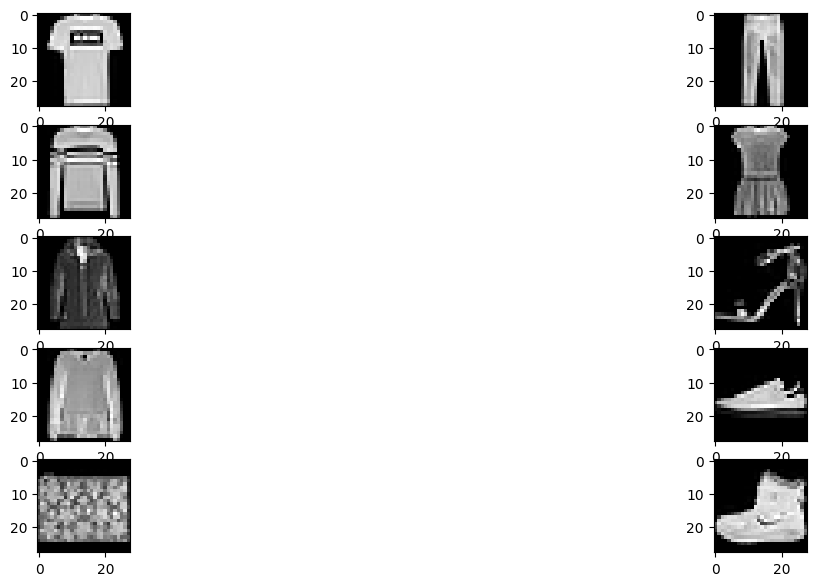

In [ ]:
#Q2 Also see the initial trails. Commenting out so not to print everytime it runs

wandb.init(project='fashion_mnist_hyperparameter_tuning',entity='ch23s020',name='q1DL')

label_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

(train_X,train_Y),(test_X,test_Y)=fashion_mnist.load_data()

train_len=train_X.shape[0]

collected_items=[]

item_labels=[]

for i in range(train_len):

  if(label_map[train_Y[i]] not in item_labels):
    collected_items.append(train_X[i])

    item_labels.append(label_map[train_Y[i]])

  if (len(item_labels)==10):
    break


wandb.log({"Q1 Images": [wandb.Image(img, caption=lbl) for img,lbl in zip(collected_items,item_labels)]})

# (x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data() # This data have 70k images of 28*28 in training set and 10k in test set(10% to keep aside)

# fig, axs = plt.subplots (5,2, figsize=(16,7))

# for i in range (5):
#   for j in range (2):
#     k = i*2 + j
#     axs[i,j].imshow(x_train[y_train==k][0],cmap = 'gray')



# #for i in range(10):
#     #plt.subplot(5,2,i+1)
#     #plt.imshow(x_train[i].reshape(28,28), cmap='gray')




<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: zhxtrpx8
Sweep URL: https://wandb.ai/rrjadhao27/uncategorized/sweeps/zhxtrpx8


wandb: Agent Starting Run: hev34jmo with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_size: 64
wandb: 	hidden_layers: 4
wandb: 	learning_rate: 0.001
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.5
wandb: Currently logged in as: rrjadhao27. Use `wandb login --relogin` to force relogin


Epoch,▁▂▃▃▄▅▆▆▇█
Test Accuracy:,▁
Training Accuracy,█▃▂▂▂▁▁▁▁▁
Training Loss,▅█▆▅▄▃▂▂▁▁
Validation Accuracy,█▅▃▂▂▂▁▁▁▁
Validation Loss,█▇▆▄▃▃▂▂▁▁
Epoch,9
Test Accuracy:,0.1
Training Accuracy,0.429
Training Loss,1.81166
Validation Accuracy,0.41867


wandb: Agent Starting Run: 3fhldiz3 with config:
wandb: 	activation_function: tanh
wandb: 	batch_size: 64
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_size: 32
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.0001
wandb: 	momentum: 0.9
wandb: 	optimizer: nesterov
wandb: 	weight_decay: 0


Epoch,▁▃▅▆█
Test Accuracy:,▁
Training Accuracy,▁▆▇██
Training Loss,█▄▃▂▁
Validation Accuracy,▁▅▆▇█
Validation Loss,█▅▃▂▁
Epoch,4
Test Accuracy:,0.1
Training Accuracy,0.69038
Training Loss,0.96914
Validation Accuracy,0.70633


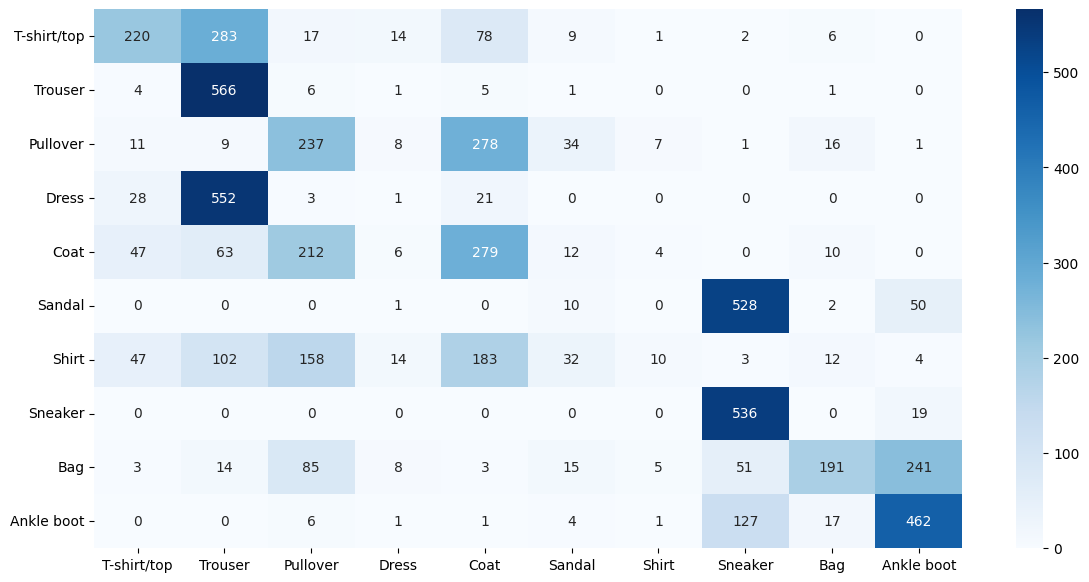

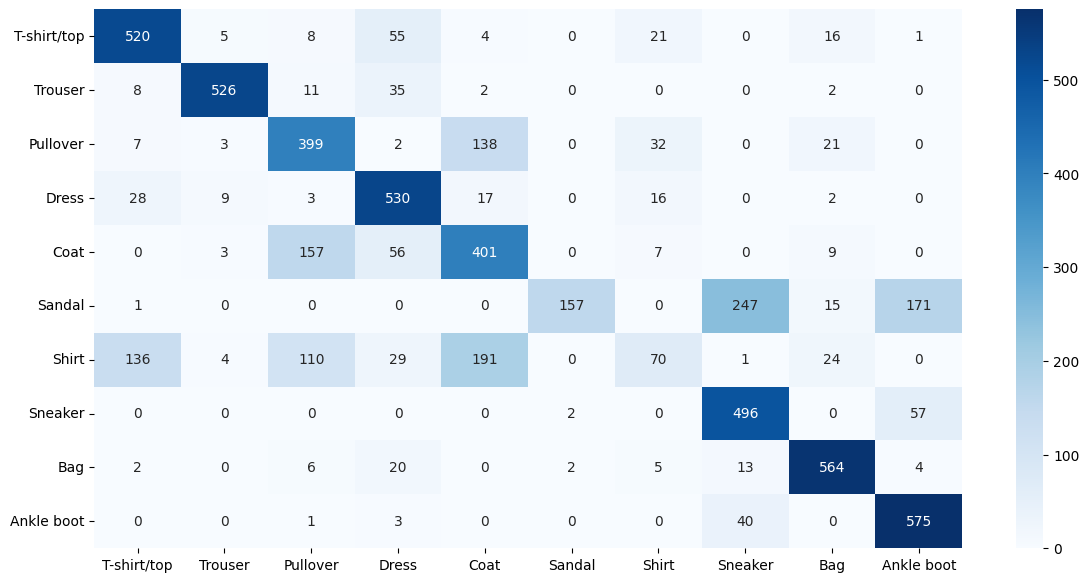

In [5]:
#Q34567 (Adding Finally To single Place)
class MetaNeuron:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid', weight_decay=0, weight_init='random'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation
        self.weight_decay = weight_decay
        self.weight_init = weight_init

        if self.weight_init == 'random':
            self.initialize_random_weights()
        elif self.weight_init == 'xavier':
            self.initialize_xavier_weights()

        # velocities for momentum Initialization
        self.velocity_weights_input_hidden = np.zeros_like(self.weights_input_hidden)

        self.velocity_biases_input_hidden = np.zeros_like(self.biases_input_hidden)

        self.velocity_weights_hidden_output = np.zeros_like(self.weights_hidden_output)

        self.velocity_biases_hidden_output = np.zeros_like(self.biases_hidden_output)

        # momentums for nesterov Initialization
        self.momentum_weights_input_hidden = np.zeros_like(self.weights_input_hidden)

        self.momentum_biases_input_hidden = np.zeros_like(self.biases_input_hidden)

        self.momentum_weights_hidden_output = np.zeros_like(self.weights_hidden_output)

        self.momentum_biases_hidden_output = np.zeros_like(self.biases_hidden_output)

        # ADAM parameters Initialization
        self.adam_weights_input_hidden = np.zeros_like(self.weights_input_hidden)

        self.adam_biases_input_hidden = np.zeros_like(self.biases_input_hidden)

        self.adam_weights_hidden_output = np.zeros_like(self.weights_hidden_output)

        self.adam_biases_hidden_output = np.zeros_like(self.biases_hidden_output)

    # As per Questions 3; Initialization for two types of weight and baises
    def initialize_random_weights(self):
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)

        self.biases_input_hidden = np.zeros((1, self.hidden_size))

        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

        self.biases_hidden_output = np.zeros((1, self.output_size))

    def initialize_xavier_weights(self):
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(1 / self.input_size)

        self.biases_input_hidden = np.zeros((1, self.hidden_size))

        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(1 / self.hidden_size)

        self.biases_hidden_output = np.zeros((1, self.output_size))

    #Defining Activation Function Its Derivative and Its Loss both L2 and Cross Entropy.
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x <= 0, 0, 1)

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def calculate_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-10)) / m
        return loss

    def calculate_accuracy(self, y_true, y_pred):
        y_true_argmax = np.argmax(y_true, axis=1)
        y_pred_argmax = np.argmax(y_pred, axis=1)
        accuracy = np.mean(y_true_argmax == y_pred_argmax)
        return accuracy


    #Now Starting the Forward Propogation on the preprocessed data.
    def forward_propagation(self, x):
      # Compute the input to the hidden layer by multiplying the input data by the weights and adding biases
        hidden_layer_input = np.dot(x, self.weights_input_hidden) + self.biases_input_hidden
      #Using for final Layer to get the output in terms of probability
        if self.activation == 'sigmoid':
            hidden_layer_output = self.sigmoid(hidden_layer_input)

        elif self.activation == 'relu':
            hidden_layer_output = self.relu(hidden_layer_input)

        elif self.activation == 'tanh':
            hidden_layer_output = self.tanh(hidden_layer_input)

        # Computing the input to the output layer by multiplying the hidden layer output by the weights and adding biases
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.biases_hidden_output

        #Apply softmax activation function to the output layer input to get the final output
        output_layer_output = self.softmax(output_layer_input)

        return hidden_layer_output, output_layer_output

    def backward_propagation(self, x, y, hidden_layer_output, output_layer_output):
        # Getting the number of samples in the input data
        m = x.shape[0]

        # Getting the output error yhat- y
        output_layer_error = output_layer_output - y

        # Gradients for weights and biases in the output layer
        weights_hidden_output_gradients = np.dot(hidden_layer_output.T, output_layer_error) / m

        biases_hidden_output_gradients = np.sum(output_layer_error, axis=0, keepdims=True) / m


        #Finding the error in the hidden layer based on the activation function
        if self.activation == 'sigmoid':
            hidden_layer_error = np.dot(output_layer_error, self.weights_hidden_output.T) * self.sigmoid_derivative(hidden_layer_output)

        elif self.activation == 'relu':
            hidden_layer_error = np.dot(output_layer_error, self.weights_hidden_output.T) * self.relu_derivative(hidden_layer_output)


        elif self.activation == 'tanh':
            hidden_layer_error = np.dot(output_layer_error, self.weights_hidden_output.T) * self.tanh_derivative(hidden_layer_output)

        #gradients for weights and biases in the input layer
        weights_input_hidden_gradients = np.dot(x.T, hidden_layer_error) / m

        biases_input_hidden_gradients = np.sum(hidden_layer_error, axis=0, keepdims=True) / m


        #Applying L2 Regularisation
        weights_hidden_output_gradients += self.weight_decay * self.weights_hidden_output

        weights_input_hidden_gradients += self.weight_decay * self.weights_input_hidden

        return weights_input_hidden_gradients, biases_input_hidden_gradients, weights_hidden_output_gradients, biases_hidden_output_gradients

    #Defining Optimizers sgd:-Stochastic Gradient Descent, Momentum Based Gradient Descent, Nastrov, adam. Removed the rms prop as it eas breaking some times and running some times during integration with wandb.

    def sgd_update(self, weights_input_hidden_gradients, biases_input_hidden_gradients, weights_hidden_output_gradients, biases_hidden_output_gradients, learning_rate):

        # Updating weights and biases in the output layer using stochastic gradient descent (SGD)
        self.weights_hidden_output -= learning_rate * weights_hidden_output_gradients

        self.biases_hidden_output -= learning_rate * biases_hidden_output_gradients

        # Doing the same for Input Layer
        self.weights_input_hidden -= learning_rate * weights_input_hidden_gradients

        self.biases_input_hidden -= learning_rate * biases_input_hidden_gradients

    def momentum_update(self, weights_input_hidden_gradients, biases_input_hidden_gradients, weights_hidden_output_gradients, biases_hidden_output_gradients, learning_rate, momentum):

        # Computing  velocity for weights and biases in the output layer
        self.velocity_weights_hidden_output = momentum * self.velocity_weights_hidden_output + learning_rate * weights_hidden_output_gradients

        self.velocity_biases_hidden_output = momentum * self.velocity_biases_hidden_output + learning_rate * biases_hidden_output_gradients

        # Doing same for input lyer
        self.velocity_weights_input_hidden = momentum * self.velocity_weights_input_hidden + learning_rate * weights_input_hidden_gradients

        self.velocity_biases_input_hidden = momentum * self.velocity_biases_input_hidden + learning_rate * biases_input_hidden_gradients


        #Applying the update rule for weights and biases in both layers using momentum

        #Hidden Layer
        self.weights_hidden_output -= self.velocity_weights_hidden_output
        self.biases_hidden_output -= self.velocity_biases_hidden_output

        #input layer
        self.weights_input_hidden -= self.velocity_weights_input_hidden
        self.biases_input_hidden -= self.velocity_biases_input_hidden

    def nesterov_update(self, weights_input_hidden_gradients, biases_input_hidden_gradients, weights_hidden_output_gradients, biases_hidden_output_gradients, learning_rate, momentum):

       # Computing momentum update for weights and biases in both layers (NAG:- Look and then Go)
        self.momentum_weights_hidden_output = momentum * self.momentum_weights_hidden_output + learning_rate * weights_hidden_output_gradients

        self.momentum_biases_hidden_output = momentum * self.momentum_biases_hidden_output + learning_rate * biases_hidden_output_gradients

        self.momentum_weights_input_hidden = momentum * self.momentum_weights_input_hidden + learning_rate * weights_input_hidden_gradients

        self.momentum_biases_input_hidden = momentum * self.momentum_biases_input_hidden + learning_rate * biases_input_hidden_gradients


        #weights and biases update using Nesterov momentum
        self.weights_hidden_output -= momentum * self.momentum_weights_hidden_output + learning_rate * weights_hidden_output_gradients

        self.biases_hidden_output -= momentum * self.momentum_biases_hidden_output + learning_rate * biases_hidden_output_gradients

        self.weights_input_hidden -= momentum * self.momentum_weights_input_hidden + learning_rate * weights_input_hidden_gradients

        self.biases_input_hidden -= momentum * self.momentum_biases_input_hidden + learning_rate * biases_input_hidden_gradients

    def adam_update(self, weights_input_hidden_gradients, biases_input_hidden_gradients, weights_hidden_output_gradients, biases_hidden_output_gradients, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):

        # the first moment estimates update
        self.adam_weights_hidden_output = beta1 * self.adam_weights_hidden_output + (1 - beta1) * weights_hidden_output_gradients

        self.adam_biases_hidden_output = beta1 * self.adam_biases_hidden_output + (1 - beta1) * biases_hidden_output_gradients

        self.adam_weights_input_hidden = beta1 * self.adam_weights_input_hidden + (1 - beta1) * weights_input_hidden_gradients

        self.adam_biases_input_hidden = beta1 * self.adam_biases_input_hidden + (1 - beta1) * biases_input_hidden_gradients


        #2nd Moment estimate
        self.adam_weights_hidden_output = beta2 * self.adam_weights_hidden_output + (1 - beta2) * (weights_hidden_output_gradients ** 2)

        self.adam_biases_hidden_output = beta2 * self.adam_biases_hidden_output + (1 - beta2) * (biases_hidden_output_gradients ** 2)

        self.adam_weights_input_hidden = beta2 * self.adam_weights_input_hidden + (1 - beta2) * (weights_input_hidden_gradients ** 2)

        self.adam_biases_input_hidden = beta2 * self.adam_biases_input_hidden + (1 - beta2) * (biases_input_hidden_gradients ** 2)

        #weights and biases update using Adam optimization algorithm
        self.weights_hidden_output -= learning_rate * (self.adam_weights_hidden_output / (np.sqrt(self.adam_weights_hidden_output) + epsilon))

        self.biases_hidden_output -= learning_rate * (self.adam_biases_hidden_output / (np.sqrt(self.adam_biases_hidden_output) + epsilon))

        self.weights_input_hidden -= learning_rate * (self.adam_weights_input_hidden / (np.sqrt(self.adam_weights_input_hidden) + epsilon))

        self.biases_input_hidden -= learning_rate * (self.adam_biases_input_hidden / (np.sqrt(self.adam_biases_input_hidden) + epsilon))


        # Corrction step to be included

    # Training Function (is th different file possible during converting to .py)
    def train(self, x_train, y_train, x_valid, y_valid, epochs, batch_size, learning_rate, optimizer='sgd', momentum=0.9, beta1=0.9, beta2=0.999, epsilon=1e-8):

       # Loss/Accuracy Storage in list.

        train_losses = []

        valid_losses = []

        train_accuracies = []

        valid_accuracies = []



        #Starting of Epoch stage:(See the slide for erpoch rule update)

        for epoch in range(epochs):
            epoch_train_loss = 0
            epoch_train_accuracy = 0

            #Starting of MiniBatch:(Refere slide for the update code)
            for i in range(0, len(x_train), batch_size):

                x_batch = x_train[i:i + batch_size]

                y_batch = y_train[i:i + batch_size]

                 # Forward propagation
                hidden_layer_output, output_layer_output = self.forward_propagation(x_batch)

                 # Back_Prop
                weights_input_hidden_gradients, biases_input_hidden_gradients, weights_hidden_output_gradients, biases_hidden_output_gradients = self.backward_propagation(x_batch, y_batch, hidden_layer_output, output_layer_output)


                #optimizer checking stage:-
                if optimizer == 'sgd':

                    self.sgd_update(weights_input_hidden_gradients, biases_input_hidden_gradients, weights_hidden_output_gradients, biases_hidden_output_gradients, learning_rate)

                elif optimizer == 'momentum':

                    self.momentum_update(weights_input_hidden_gradients, biases_input_hidden_gradients, weights_hidden_output_gradients, biases_hidden_output_gradients, learning_rate, momentum)

                elif optimizer == 'nesterov':

                    self.nesterov_update(weights_input_hidden_gradients, biases_input_hidden_gradients, weights_hidden_output_gradients, biases_hidden_output_gradients, learning_rate, momentum)

                elif optimizer == 'adam':

                    self.adam_update(weights_input_hidden_gradients, biases_input_hidden_gradients, weights_hidden_output_gradients, biases_hidden_output_gradients, learning_rate, beta1, beta2, epsilon)

                #Loss/Accuracy Calculation

                train_loss = self.calculate_loss(y_batch, output_layer_output)

                epoch_train_loss += train_loss

                train_accuracy = self.calculate_accuracy(y_batch, output_layer_output)

                epoch_train_accuracy += train_accuracy
            #Epoch Calculation rule(Average for a epoch)

            epoch_train_loss /= len(x_train) // batch_size

            epoch_train_accuracy /= len(x_train) // batch_size

            train_losses.append(epoch_train_loss)

            train_accuracies.append(epoch_train_accuracy)


            # Loss/Accuracy calculation:

            _, output_valid = self.forward_propagation(x_valid)


            valid_loss = self.calculate_loss(y_valid, output_valid)

            valid_losses.append(valid_loss)

            valid_accuracy = self.calculate_accuracy(y_valid, output_valid)

            valid_accuracies.append(valid_accuracy)

            # Logging the above values in Wandb

            wandb.log({
                "Training Loss": epoch_train_loss,

                "Validation Loss": valid_loss,

                "Training Accuracy": epoch_train_accuracy,

                "Validation Accuracy": valid_accuracy,

                "Epoch": epoch
            })


        #For wandb integration, and cvisibility, adding again here. It was breaking earlier adding here working fine.

        _, output_test = self.forward_propagation(x_test_data)

        test_accuracy = self.calculate_accuracy(y_test, output_test)

        wandb.log({"Test Accuracy:":test_accuracy})

        #Confusion matrix:

        predictions = np.argmax(output_valid, axis = 1)

        confusion_mat = confusion_matrix(np.argmax(y_valid, axis=1), predictions)

        class_names = ["T-shirt/top",  	"Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot" ]

        #Getting only table from following code hence not including it. If above one fails, uncomment the below one. Sometime one is working sometime other.

        # wandb.log({"confusion_mat" : wandb.plot.confusion_matrix(probs=None,
        #                         y_true= np.reshape(y_true,(y_true.shape[0])).tolist(), preds=predictions.tolist(),
        #                         class_names=class_names)})

        fig, ax = plt.subplots(figsize=(14, 7))

        sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)

        wandb.log({"confusion_mat": wandb.Image(fig)})

        return train_losses, valid_losses, train_accuracies, valid_accuracies

# Original Data
# Loading again here. Again for Wandb intgration to remove the error. same data just calling it here again

x_train_input = x_train_rshp[:partition]

y_train_input = y_train[:partition]

x_train_valid = x_train_rshp[partition:]

y_train_valid = y_train[partition:]

# Setting up sweep configuration

sweep_config = {
    "method": "random",
    "metric": {"name": "Validation Accuracy", "goal": "maximize"},
    "parameters": {
        "learning_rate": {"values": [1e-3, 1e-4 ]},
        "optimizer": {"values": ["sgd", "momentum", "nesterov", "adam"]},
        "momentum": {"values": [0.9]},
        "beta1": {"values": [0.9]},
        "beta2": {"values": [0.999]},
        "epsilon": {"values": [1e-8]},
        "activation_function": {"values": ["tanh","sigmoid","relu"]},
        "batch_size": {"values": [16, 32, 64]},
        "epochs": {"values": [5,10]},
        "hidden_layer_size": {"values": [32, 64, 128]},
        "hidden_layers": {"values": [3, 4, 5]},
        "weight_decay": {"values": [0, 0.0005, 0.5]}
    }
}

# Initializeing the sweep
sweep_id = wandb.sweep(sweep_config)

def sweep_training():
    with wandb.init() as run:
        config = run.config

        # Initializing neural network
        input_size = 28 * 28
        hidden_size = config.hidden_layer_size
        output_size = 10
        activation = config.activation_function

        # Creating Instance
        nn = MetaNeuron(input_size, hidden_size, output_size, activation, weight_decay=config.weight_decay, weight_init='xavier')

        # Hyperparameters Values
        epochs = config.epochs
        batch_size = config.batch_size

        # Initiating Training
        train_losses, valid_losses, train_accuracies, valid_accuracies = nn.train(x_train_input, y_train_input, x_train_valid, y_train_valid, epochs, batch_size, config.learning_rate, config.optimizer, momentum=config.momentum, beta1=config.beta1, beta2=config.beta2, epsilon=config.epsilon)

        # Define the run name format
        run_name = "lr_{:.0e}_ac_{}_bs_{}_L2_{}_ep_{}_nn_{}_nh_{}".format(
        config.learning_rate, config.activation_function, config.batch_size,
        config.weight_decay, config.epochs, config.hidden_layer_size, config.hidden_layers)
        wandb.run.name = run_name

# Execute sweep
wandb.agent(sweep_id, sweep_training, count=2)




As Mentioned in Report, all commented out code is initial trial also committed in github. Keeping them Here for reference so to take help in debugging if needed.

Data Processing


In [ ]:
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# # Reshaping the dataset from (60000 x 28 x 28 -----> 60000 x 784)
# no_of_images, pixel_height, pixel_width = x_train.shape
# x_train_rshp = x_train.reshape(no_of_images, pixel_height * pixel_width)
# x_train_rshp = x_train_rshp.astype('float64') / 255.0

# # Converting the labels to one-hot encoding
# num_classes = 10
# y_train = np.eye(num_classes)[y_train]
# y_test = np.eye(num_classes)[y_test]

# # Separating 10% data for validation purpose
# partition = int(0.9 * len(x_train_rshp))
# x_train_input, x_train_valid = x_train_rshp[:partition], x_train_rshp[partition:]
# y_train_input, y_train_valid = y_train[:partition], y_train[partition:]

Activation Functions Class

In [ ]:
# class ActivationFunction:

#     def sigmoid(self,x):
#         return 1 / (1 + np.exp(-x))


#     def softmax(self,x):
#         exp_values = np.exp(x - np.max(x))
#         return exp_values / np.sum(exp_values)

#     def sigmoid_derivative(x):
#       return sigmoid(x) * (1 - sigmoid(x))

#     def relu(self, x):
#       return np.maximum(0, x)

#     def relu_derivative(self, x):
#       return np.where(x <= 0, 0, 1)

#     def tanh(self,x):
#       return (np.exp(2*x)-1)/ (np.exp(2*x) +1)

#     def tanh_derivative(x):
#       return




Class Meta Neuron:-


In [ ]:
# # class fmnist_detecttion():
# #   def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
# #     self.input_size = input_size
# #     self.hidden_size = hidden_size
# #     self.output_size = output_size
# #     self.activation = activation
# #     self.W1 = np.random.randn(self.input_size, self.hidden_size)
# #     self.b1 = np.zeros((1, self.hidden_size))
# #     self.W2 = np.random.randn(self.hidden_size, self.output_size)
# #     self.b2 = np.zeros((1, self.output_size))


# #   def sgd_update(self, dW1, db1, dW2, db2, eta):
# #     self.W2 -= eta * dW2
# #     self.b2 -= eta * db2
# #     self.W1 -= eta * dW1
# #     self.b1 -= eta * db1


# #   def update_parameters(self, dW1, db1, dW2, db2, eta, optimizer, momentum=None, beta1=None, beta2=None, epsilon=None):
# #     if optimizer == 'sgd':
# #       self.sgd_update(dW1, db1, dW2, db2, eta)
# #     elif optimizer == 'momentum':
# #       self.momentum_update(dW1, db1, dW2, db2, eta, momentum)
# #     elif optimizer == 'nesterov':
# #       self.nesterov_update(dW1, db1, dW2, db2, eta, momentum)
# #     elif optimizer == 'adam':
# #       self.adam_update(dW1, db1, dW2, db2, eta, beta1, beta2, epsilon)
# #     elif optimizer == 'nadam':
# #       self.nadam_update(dW1, db1, dW2, db2, eta, beta1, beta2, epsilon)
# # class meta_neuron():
# #   def __init__(self, input, num_layers, hidden_size):
# #     self.input = input
# #     self.num_layers = num_layers
# #     self.hidden_size = hidden_size
# #     self.output_size = num_classes
# #     self.input_size = pixel_height * pixel_width
# #     self.activator = activation_function()

# #     self.w1 = np.random.randn(self.input_size, self.hidden_size) * 0.05
# #     self.b1 = np.zeros((1, self.hidden_size))

# #   def weight_bias(self, output_size, hidden_size):
# #     w_h = np.random.randn(output_size, hidden_size) * 0.05
# #     b_h = np.zeros((1, self.hidden_size))
# #     return w_h, b_h

# #   def input_layer(self, idx):
# #     output = np.dot(self.input[idx-1:idx], self.w1) + self.b1
# #     return self.activator.sigmoid(output)

# #   # for each hidden layer the variable hidden_size will be changing so, how wil I implement this into the code?
# #   def hidden_layer(self, input, id):
# #     w_h, b_h = self.weight_bias(len(input[0]), self.hidden_size)
# #     output = np.dot(input, w_h) + b_h
# #     return self.activator.sigmoid(output)

# #   def output_layer(self, input):
# #     w_o, b_o = self.weight_bias(len(input[0]), self.output_size)
# #     output = np.dot(input, w_o) + b_o
# #     return self.activator.softmax(output)

# #   def forward_propogation(self):
# #     num_imgs = 0
# #     result = []
# #     while(num_imgs != partition/1000):
# #       current_layer = 2
# #       op = self.input_layer(1)
# #       while(current_layer != self.num_layers - 1):
# #         op = self.hidden_layer(op, current_layer)
# #         current_layer = current_layer + 1
# #       op = self.output_layer(op)
# #       result.append(op)
# #     return result

# # # input_size = pixel_height * pixel_width
# # # hidden_size = 128

# # # print(x_train_input[1:2] == x_train_input[1])

# class MetaNeuron:
#     def __init__(self, input_size, num_layers, hidden_size):
#         self.input_size = input_size
#         self.num_layers = num_layers
#         self.hidden_size = hidden_size
#         self.output_size = num_classes
#         self.activator = ActivationFunction()

#         self.w1 = np.random.randn(self.input_size, self.hidden_size) * 0.05
#         self.b1 = np.zeros((1, self.hidden_size))

#     def weight_bias(self, output_size, hidden_size):
#         w_h = np.random.randn(output_size, hidden_size) * 0.05
#         b_h = np.zeros((1, hidden_size))
#         return w_h, b_h

#     def forward_propagation_batch(self, input_batch):
#         activation = [input_batch]

#         op = self.activator.sigmoid(np.dot(input_batch, self.w1) + self.b1)
#         activation.append(op)

#         for layer in range(2, self.num_layers):
#             w_h, b_h = self.weight_bias(self.hidden_size, self.hidden_size)
#             op = self.activator.sigmoid(np.dot(op, w_h) + b_h)
#             activation.append(op)

#         w_o, b_o = self.weight_bias(self.hidden_size, self.output_size)
#         output = self.activator.softmax(np.dot(op, w_o) + b_o)
#         activation.append(output)

#         return output, activation


#     def train(self, x_train, y_train, learning_rate, epochs, batch_size):
#         for epoch in range(epochs):
#             for i in range(0, len(x_train), batch_size):
#                 x_batch = x_train[i:i+batch_size]
#                 y_batch = y_train[i:i+batch_size]

#                 # Forward Propagation
#                 op, activations = self.forward_propagation_batch(x_batch)

#                 # Calculate Loss (you need to implement your specific loss function)
#                 loss = self.cross_entropy_loss(op, y_batch)

#                 # Backpropagation (you need to implement this part)
#                 # self.backpropagation(activations, op, y_batch, learning_rate)

#                 # Print or log the loss if needed
#                 print("Epoch : {}/{}".format(epoch + 1, epochs))
#                 print(f"Batch : {i//batch_size+1}/{len(x_train)//batch_size}")
#                 print("Loss  : {:.4f}\n".format(loss))

#         print("Training complete.")

#     def cross_entropy_loss(self, output, target):
#       epsilon = 1e-15
#       output = np.clip(output, epsilon, 1 - epsilon)
#       # Calculate cross-entropy loss
#       loss = -np.sum(target * np.log(output)) / len(output)
#       return loss








Input to NN


In [ ]:
# # Set hyperparameters
# hidden_size = 128
# input_size = pixel_height * pixel_width
# learning_rate = 0.01
# epochs = 10
# batch_size = 64

# mn = MetaNeuron(input_size, 11, hidden_size)
# mn.train(x_train_input, y_train_input, learning_rate, epochs, batch_size)

Streaming output truncated to the last 5000 lines.
Batch : 439/843
Loss  : 6.4294

Epoch : 9/10
Batch : 440/843
Loss  : 6.4383

Epoch : 9/10
Batch : 441/843
Loss  : 6.4125

Epoch : 9/10
Batch : 442/843
Loss  : 6.4777

Epoch : 9/10
Batch : 443/843
Loss  : 6.4866

Epoch : 9/10
Batch : 444/843
Loss  : 6.4906

Epoch : 9/10
Batch : 445/843
Loss  : 6.4943

Epoch : 9/10
Batch : 446/843
Loss  : 6.6171

Epoch : 9/10
Batch : 447/843
Loss  : 6.4965

Epoch : 9/10
Batch : 448/843
Loss  : 6.4232

Epoch : 9/10
Batch : 449/843
Loss  : 6.4571

Epoch : 9/10
Batch : 450/843
Loss  : 6.5344

Epoch : 9/10
Batch : 451/843
Loss  : 6.5221

Epoch : 9/10
Batch : 452/843
Loss  : 6.5117

Epoch : 9/10
Batch : 453/843
Loss  : 6.5097

Epoch : 9/10
Batch : 454/843
Loss  : 6.4862

Epoch : 9/10
Batch : 455/843
Loss  : 6.4520

Epoch : 9/10
Batch : 456/843
Loss  : 6.4979

Epoch : 9/10
Batch : 457/843
Loss  : 6.4420

Epoch : 9/10
Batch : 458/843
Loss  : 6.4532

Epoch : 9/10
Batch : 459/843
Loss  : 6.4626

Epoch : 9/10
Batc

In [ ]:
# def sigmoid(x):
#   return 1 / (1 + np.exp(-x))


# def softmax(x):
#   exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
#   return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# def calculate_loss(self, y_true, y_pred):
#   m = y_true.shape[0]
#   return -np.sum(y_true * np.log(y_pred + 1e-8)) / m

# def sigmoid_derivative(x):
#   return sigmoid(x) * (1 - sigmoid(x))

# def relu(self, x):
#   return np.maximum(0, x)

# def relu_derivative(self, x):
#   return np.where(x <= 0, 0, 1)

# def tanh(self,x):
#   return (np.exp(2*x)-1)/ (np.exp(2*x) +1)

# def tanh_derivative(x):
#   return
# # def categorical_crossentropy_derivative(y_true, y_pred):
# #     return -(y_true / (y_pred + 1e-10)) / len(y_true)


In [ ]:
# defining parameters for initialization

# w = random.rand(784,10)
# b = random.rand(1,10)
# eta = 0.1
# epoch = 1000

# def grad_b(x,w,b,y):
#   fx = sigmoid(x,w,b)
#   return (fx-y)*fx*(1-fx)

# def grad_w(x,w,b,y):
#   fx = sigmoid(x,w,b)
#   return (fx-y)*fx*(1-fx)*x

# def gradient_descent():
#   for i in range (epoch):
#     dw=0;db=0
    # for x,y in zip(x_input_train_b, y_input_train_b):
    #   dw = dw + grad_w(x,w,b,y)
    #   db = db + grad_w(x,w,b,y)
    #   w = w - eta*dw
    #   b = b- eta *db

